In [1]:
#importing the stuff to make our graphs
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#importing our stats, pandas, datetime and pretty print
import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
ST = Base.classes.station
MS = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# running inspector to have a closer look at columns in csvs handy
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columnss = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
print()
for c in columnss:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# getting some quick snapshots of certain data to learn more about what's in it
#session.query(func.count(ST.date)).all()
session.query(func.count(MS.date)).all()


[(19550,)]

In [11]:
# Find the most recent date in the data set.
session.query(MS.date).order_by(MS.date.desc()).first()

('2017-08-23',)

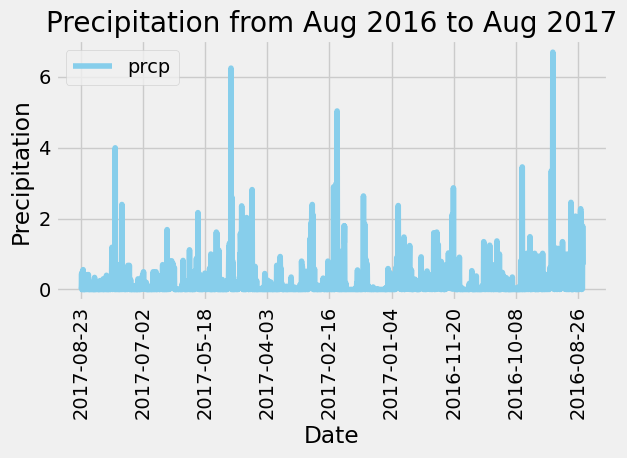

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.datetime(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
thession = session.query(MS.date).filter(MS.date > '2016-08-22').order_by(MS.date.desc())
meshin = thession.with_entities(MS.date, MS.prcp).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(meshin,columns=['date','prcp'])
df
# Sort the dataframe by date
df = df.dropna()
df.set_index('date', inplace = True)
df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(color = 'skyblue')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation from Aug 2016 to Aug 2017')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats = df.describe()
stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# running inspector to have a closer look at columns in csvs handy
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columnss = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
print()
for c in columnss:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(func.count(ST.station)).all()
print('total number of stations:', number_of_stations)

total number of stations: [(9,)]


In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_entries = session.queryfunc.count(MS.station)
active_stations = session.query(MS.station, station_entries, MS.tobs).group_by(MS.station).order_by(station_entries.desc()).all()
active_stations = pd.DataFrame(active_stations,columns=['station','entries', 'temps'])
active_stations

,station,entries,temps
0,USC00519281,2772,70.0
1,USC00519397,2724,65.0
2,USC00513117,2709,67.0
3,USC00519523,2669,75.0
4,USC00516128,2612,73.0
5,USC00514830,2202,67.0
6,USC00511918,1979,66.0
7,USC00517948,1372,75.0
8,USC00518838,511,72.0


In [17]:
pprint(active_stations)

[('USC00519281', 2772, 70.0),
 ('USC00519397', 2724, 65.0),
 ('USC00513117', 2709, 67.0),
 ('USC00519523', 2669, 75.0),
 ('USC00516128', 2612, 73.0),
 ('USC00514830', 2202, 67.0),
 ('USC00511918', 1979, 66.0),
 ('USC00517948', 1372, 75.0),
 ('USC00518838', 511, 72.0)]


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = 'USC00519281'
sel = [MS.station, func.min(MS.tobs), func.max(MS.tobs), func.avg(MS.tobs)]
active_station = session.query(*sel).filter((MS.station) == station).all()
active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station = 'USC00519281'
sel = [MS.station, MS.tobs, MS.date]
active_station = session.query(*sel).filter(MS.date > '2016-08-22').filter((MS.station) == station).all()
active_station = pd.DataFrame(active_station,columns=['station','temps','date'])
active_station

,station,temps,date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27
...,...,...,...
347,USC00519281,77.0,2017-08-14
348,USC00519281,77.0,2017-08-15
349,USC00519281,76.0,2017-08-16
350,USC00519281,76.0,2017-08-17


In [35]:
print(active_station['temps'].min())
print(active_station['temps'].max())

59.0
83.0


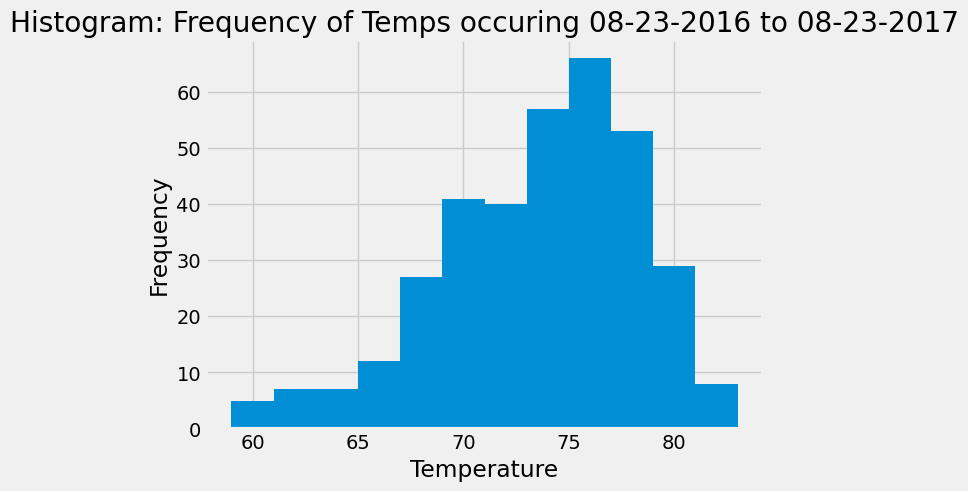

In [50]:
temp_data = active_station['temps']
plt.hist(temp_data, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram: Frequency of Temps occuring 08-23-2016 to 08-23-2017')
plt.show()

# Close Session

In [51]:
# Close Session
session.close()